#Частина третя: Аналіз датасет c Kaggle.com

##Intro:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Прочитайте csv файл (використовуйте функцію read_csv):

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/bestsellers with categories.csv")

Виведіть перші п'ять рядків (використовується функція head):

In [4]:
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape):

In [5]:
data.shape

(550, 7)

***Question***: Про скільки книг зберігає дані датасет?

In [6]:
data.drop_duplicates()
number_of_books = data['Name'].value_counts() # count number of rows with each unique value of variable

print(f"There are {len(number_of_books)} of books in this table.")

There are 351 of books in this table.


In [7]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.head(5)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


##Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum):

In [8]:
num = data.isna().sum()

if num.any() > 0:
  ans = "Так"
else:
  ans = "Ні"
print(f"Чи є в якихось змінних пропуски? {ans}")

Чи є в якихось змінних пропуски? Ні


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри?

In [9]:
unique_genre = data['genre'].unique()

print(f"There are such genres:{unique_genre}.")

There are such genres:['Non Fiction' 'Fiction'].


Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist'):

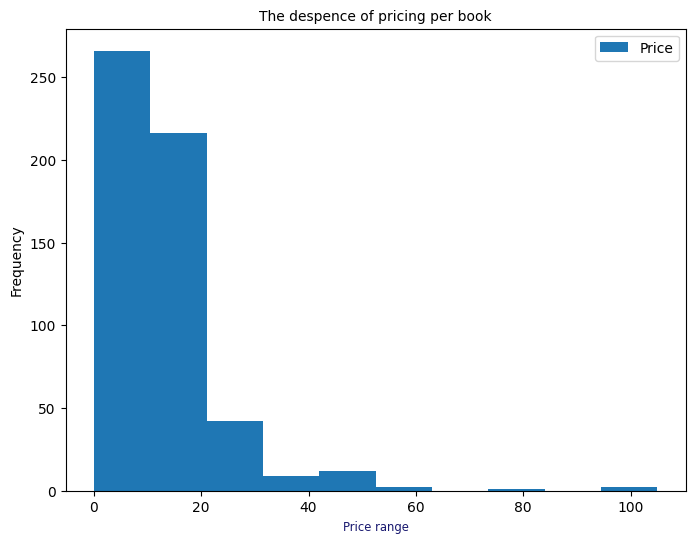

In [10]:
data['price'].plot(kind='hist', figsize=(8, 6))
plt.title('The despence of pricing per book', fontsize=10)
plt.xlabel('Price range', fontsize='small', color='midnightblue')

plt.legend(['Price'],loc='best')

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median):

In [12]:
max_price = data['price'].max()
print(f"The highest price per a book is {max_price} usd. \n")

min_price = data['price'].min()
print(f"The lowest price per a book is {min_price} usd. \n")

avg_price = data['price'].mean().round(2)
print(f"The average price per a book is {avg_price} usd. \n")

median_price = data['price'].median()
print(f"The median of a book's price is {median_price} usd. \n")


The highest price per a book is 105 usd. 

The lowest price per a book is 0 usd. 

The average price per a book is 13.1 usd. 

The median of a book's price is 11.0 usd. 



##Пошук та сортування даних

***Question***: Який рейтинг у датасеті найвищий?

In [13]:
print(f"Який рейтинг у датасеті найвищий? -> {data['user_rating'].max()}")

Який рейтинг у датасеті найвищий? -> 4.9


***Question***: Скільки книг мають такий рейтинг? Відповідь:

In [15]:
books = data[data['user_rating'] == 4.9].groupby('name').size()
max_raiting_count = books.sum()

print(f"There are books with a user rating of 4.9: {max_raiting_count}")

There are books with a user rating of 4.9: 52


***Question***: Яка книга має найбільше відгуків?

In [16]:
max_reviews = data[data['reviews'] == data['reviews'].max()].groupby('name').sum(numeric_only=True)
book_name = max_reviews.index[0]

print(f"The name of book is: '{book_name}'")
print(f"\n{max_reviews}")

The name of book is: 'Where the Crawdads Sing'

                         user_rating  reviews  price  year
name                                                      
Where the Crawdads Sing          4.8    87841     15  2019


***Question***: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [23]:
data_2015 = data[data['year'] == 2015]
price_max = data_2015['price'].max()
price_max_book = data_2015.loc[data_2015['price'].idxmax(), 'name']
print(f"The most expensive book from the Top-50 in 2015 is \n  '{price_max_book}' \n   with a price of {price_max} dollars.")

The most expensive book from the Top-50 in 2015 is 
  'Publication Manual of the American Psychological Association, 6th Edition' 
   with a price of 46 dollars.


In [19]:
data_2015 = data[data['year'] == 2015]
top_10 = data_2015.sort_values(by='price', ascending=False).head(10)
top_10

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
310,StrengthsFinder 2.0,Gallup,4.0,5069,17,2015,Non Fiction
483,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2015,Non Fiction
335,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,4.7,4725,16,2015,Non Fiction
492,The Wright Brothers,David McCullough,4.7,6169,16,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction


*Question*: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 

In [20]:
book_2010_fiction = data[(data['year'] == 2010) & (data['genre'] == 'Fiction')]
num_books = book_2010_fiction.size

print(f"There are {num_books} fiction books in the year, 2010.")

There are 140 fiction books in the year, 2010.


*Question*: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [21]:
books_2010_2011 = data[((data['year'] == 2010) | (data['year'] == 2011)) & (data['user_rating'] == 4.9)]
num_books = books_2010_2011.shape[0]
print(f"The total number of books with rating 4.9 in 2010 and 2011 is: \n '{num_books}'")

book_names = books_2010_2011.groupby('name').sum(numeric_only=True).index[0]
print(f"\nThe name of that book is: \n   {book_names}")

The total number of books with rating 4.9 in 2010 and 2011 is: 
 '1'

The name of that book is: 
   Jesus Calling: Enjoying Peace in His Presence (with Scripture References)


In [25]:
data_filtered = data.loc[(data['year'].isin([2010, 2011])) & (data['user_rating'] == 4.9), ['name', 'author', 'user_rating']]
print(f"The author of the book is: \n {data_filtered['author'].iloc[0]} \n {data_filtered['name'].iloc[0]} \n {data_filtered['user_rating'].iloc[0]}")

The author of the book is: 
 Sarah Young 
 Jesus Calling: Enjoying Peace in His Presence (with Scripture References) 
 4.9


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values):

In [26]:
books_2015 = data[data['year'] == 2015]
below_required_price = books_2015[books_2015['price'] < 8].sort_values(by='price', ascending=False)
below_required_price

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction


*Question*: Яка книга остання у відсортованому списку?

In [27]:
print(f"The name of a last book in the list is: \n   {below_required_price['name'].iloc[-1]}")

The name of a last book in the list is: 
   To Kill a Mockingbird


##Агрегування даних та з'єднання таблиць

In [28]:
data.head(2)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction


Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам:

In [ ]:
data.groupby(['genre'])['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


***Question***: Максимальна ціна для жанру Fiction:

In [ ]:
fiction_data = data[data['genre'] == 'Fiction']
max_price_fiction = fiction_data['price'].agg('max')
print(f'The maximum price for a book, Fiction genre, is {max_price_fiction} USD. ')

The maximum price for a book, Fiction genre, is 82 USD. 


***Question***: Мінімальна ціна для жанру Fiction: 

In [ ]:
min_price_fiction = fiction_data['price'].agg('min')
print(f" The minimum price for a book, Fiction genre, is {min_price_fiction} USD.")

 The minimum price for a book, Fiction genre, is 0 USD.


***Question***: Максимальна ціна для жанру Non Fiction:

In [ ]:
fiction_Data = data[data['genre'] == 'Non Fiction']
max_price_non_fiction = fiction_Data['price'].agg('max')
print(f"The max price for this book, Non Fiction, is {max_price_non_fiction} USD.")

The max price for this book, Non Fiction, is 105 USD.


***Question***: Мінімальна ціна для жанру Non Fiction:

In [ ]:
min_price_non_fiction = fiction_Data['price'].agg('min')
print(f"The min price for this book, Non Fiction, is {min_price_non_fiction} USD.")

The min price for this book, Non Fiction, is 0 USD.


Тепер створіть **`новий`** датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [51]:
authors_books = data['author'].value_counts().rename_axis('author').reset_index(name='num_books')
authors_books

,author,num_books
0,Jeff Kinney,12
1,Gary Chapman,11
2,Rick Riordan,11
3,Suzanne Collins,11
4,American Psychological Association,10
...,...,...
243,Keith Richards,1
244,Chris Cleave,1
245,Alice Schertle,1
246,Celeste Ng,1


***Question***: Якої розмірності вийшла таблиця?

In [ ]:
authors_books.shape

(248, 1)

***Question***: Який автор має найбільше книг?

In [33]:
authors_books = authors_books.sort_values(by='num_books', ascending=False)
print(f"The author with the highest number of books is {authors_books.index[0]} with \n {authors_books.iloc[0]['num_books']} books.")


The author with the highest number of books is Jeff Kinney with 
 12 books.


***Question***: Скільки книг цього автора?

In [ ]:
books_by_Kinney = data[data['author'] == 'Jeff Kinney']
list_of_books = books_by_Kinney['name'].values.tolist()

print(f"Jeff Kinney has written the following books:\n")

for book in list_of_books:
  print(f"- {book}")

Jeff Kinney has written the following books:

- Cabin Fever (Diary of a Wimpy Kid, Book 6)
- Diary of a Wimpy Kid: Hard Luck, Book 8
- Diary of a Wimpy Kid: The Last Straw (Book 3)
- Diary of a Wimpy Kid: The Long Haul
- Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)
- Double Down (Diary of a Wimpy Kid #11)
- Old School (Diary of a Wimpy Kid #10)
- The Getaway
- The Meltdown (Diary of a Wimpy Kid Book 13)
- The Third Wheel (Diary of a Wimpy Kid, Book 7)
- The Ugly Truth (Diary of a Wimpy Kid, Book 5)
- Wrecking Ball (Diary of a Wimpy Kid Book 14)


Тепер створіть **`другий`** датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні:

In [42]:
rating = data.groupby(['author'])['user_rating'].mean().sort_values(ascending=False).reset_index(name='average_rating')
rating

,author,average_rating
0,Patrick Thorpe,4.9
1,Lin-Manuel Miranda,4.9
2,Chip Gaines,4.9
3,Sherri Duskey Rinker,4.9
4,Nathan W. Pyle,4.9
...,...,...
243,Paula Hawkins,4.1
244,Muriel Barbery,4.0
245,Gillian Flynn,4.0
246,Gallup,4.0


***Question***: У якого автора середній рейтинг мінімальний?

In [45]:
author_with_min_avg_rating = rating.loc[rating['average_rating'].idxmin(), 'author']

print(f"Автор з мінімальним середнім рейтингом: {author_with_min_avg_rating}")

Автор з мінімальним середнім рейтингом: Donna Tartt


***Question***: Який у цього автора середній рейтинг?

In [46]:
raiting_by_Tartt = rating[rating['author'] == 'Donna Tartt']
avg_rating = raiting_by_Tartt.groupby(['author'])['average_rating'].mean()
print(f"The average raiting for {raiting_by_Tartt.iloc[0]['author']} is {avg_rating.iloc[0]}")

The average raiting for Donna Tartt is 3.9


З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну:

In [65]:
author_info = pd.merge(authors_books, rating, on='author', how='outer').sort_values(by=['num_books', 'average_rating'])
author_info.columns = ['author', 'num_books', 'average_rating']
author_info.reset_index(drop=True)
author_info


,author,num_books,average_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values):

In [67]:
author_info.sort_values(by=['num_books','average_rating'], ascending=True).round(2)

,author,num_books,average_rating
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77


***Question***: Який автор перший у списку?

In [70]:
print(f"The first author in the list is {author_info['author'].iloc[0]}")

The first author in the list is Muriel Barbery


##***Graphs***:

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

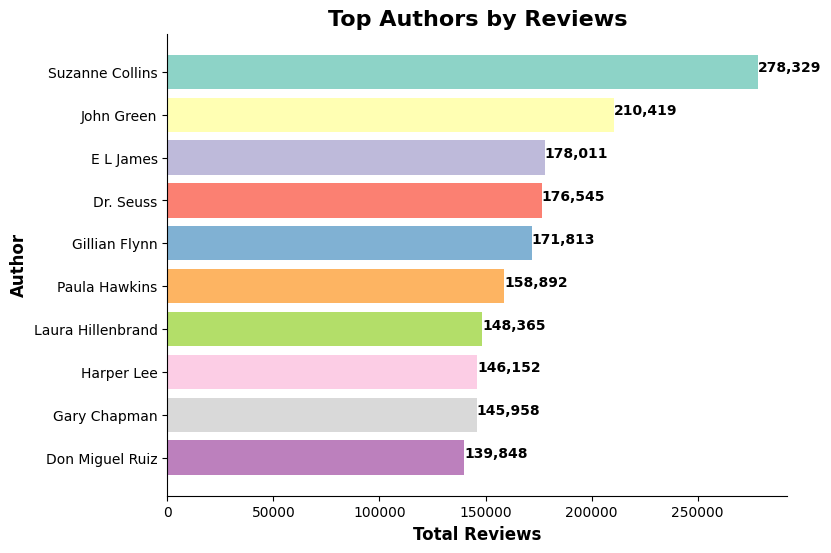

In [72]:
grouped_data = data.groupby("author")["reviews"].sum()

top_authors = grouped_data.sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(8,6))

colors = plt.cm.Set3(range(len(top_authors)))
ax.barh(top_authors.index, top_authors.values, color=colors)
ax.set_title("Top Authors by Reviews", fontsize=16, fontweight="bold")
ax.set_xlabel("Total Reviews", fontsize=12, fontweight="bold")
ax.set_ylabel("Author", fontsize=12, fontweight="bold")
ax.invert_yaxis()
ax.spines[['right', 'top']].set_visible(False)

for i, v in enumerate(top_authors.values):
    ax.text(v, i, '{:,}'.format(v), fontsize=10, color="black", fontweight="bold")

plt.show()


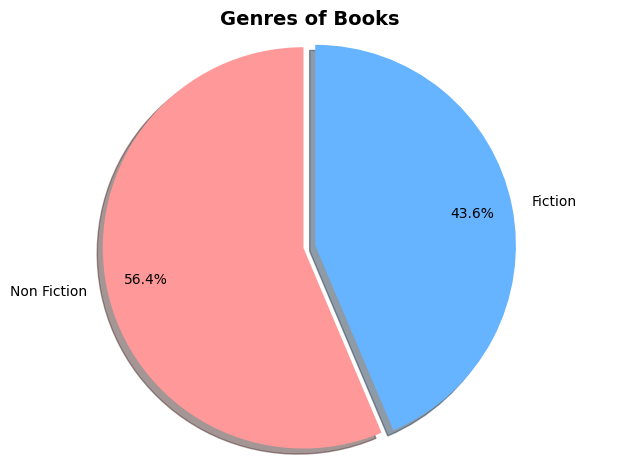

In [ ]:
books = data['genre'].value_counts()
explode = [0.03, 0.03]

colors = ['#ff9999', '#66b3ff']
plt.pie(
    books.values,
    labels=books.index,
    shadow=True,
    colors=colors,
    explode=explode,
    autopct="%1.1f%%",
    pctdistance=0.8,
    labeldistance=1.1,
    startangle=90
)

plt.title("Genres of Books", fontweight="bold", fontsize=14)
plt.axis('equal')
plt.tight_layout() # to avoid overlaps

plt.show()

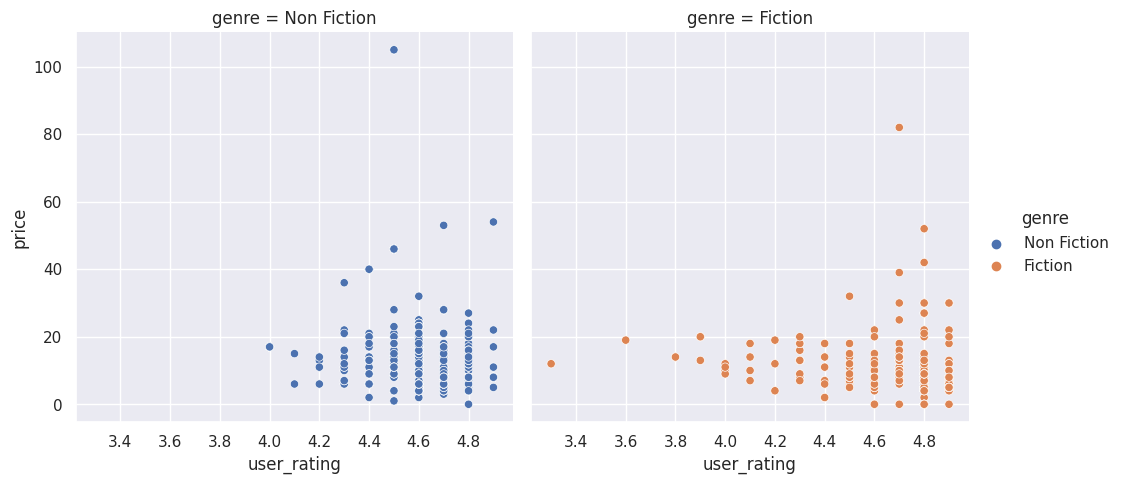

In [ ]:
sns.set_style("darkgrid",  {'axes.labelcolor':"(0.5,0.5,0)", 'axes.edgecolor':'#061358',
'xtick.color':'#0A5806'})

sns.set_theme(style="darkgrid")
sns.relplot(x="user_rating", y="price", hue="genre", kind='scatter', col='genre', data=data);

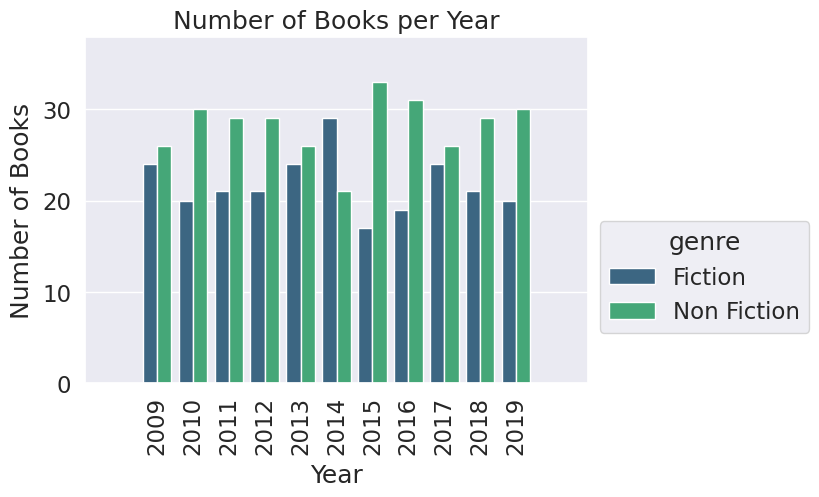

In [90]:
sns.set_style("darkgrid")

books_per_year = data.groupby(['year', 'genre'])['name'].count().reset_index()

g = sns.barplot(data=books_per_year, x="year", y="name", hue="genre", palette="viridis")

g.set_xlabel("Year", labelpad=6)
g.set_ylabel("Number of Books", labelpad=6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 0.5))

g.set_title("Number of Books per Year")
g.figure.set_size_inches(6.5, 4.5)
g.axes.margins(.15)
plt.show();

# plt.xlabel("Year", fontsize=10)

# sns.set(font_scale=1.5)
# plt.title("Number of Books per Year", fontsize=14, fontweight="bold")
# plt.xlabel("Year", fontsize=10)
# plt.xticks(rotation=90)
# plt.ylabel("Number of Books", fontsize=10)
# plt.legend(bbox_to_anchor=(1.0, 1.0))

# plt.show();